<a href="https://colab.research.google.com/github/dajebbar/Diabetes-Classification/blob/main/Multicollinearity_and_VIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multicollinearity & VIF(Variance Inflation Factor)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
diabetes_df = pd.read_csv('./diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Prepare Data

In [3]:
def zero_check(df):
  features_list = df.columns[:-1].tolist()
  for feature in features_list:
    print(f'No of zeros in {feature} : {df[df[feature] <= 0].shape[0]}')

In [4]:
zero_check(diabetes_df)

No of zeros in Pregnancies : 111
No of zeros in Glucose : 5
No of zeros in BloodPressure : 35
No of zeros in SkinThickness : 227
No of zeros in Insulin : 374
No of zeros in BMI : 11
No of zeros in DiabetesPedigreeFunction : 0
No of zeros in Age : 0


In [5]:
def zero_to_mean(df):
  list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
  for item in list:
    df[item] = np.where(df[item] < 0, 0, df[item])
    print(f'{item} mean: {df[item].mean()}')
    df[item] = df[item].replace(0, df[item].mean())

In [6]:
zero_to_mean(diabetes_df)
print()
zero_check(diabetes_df)

Glucose mean: 120.89453125
BloodPressure mean: 69.10546875
SkinThickness mean: 20.536458333333332
Insulin mean: 79.79947916666667
BMI mean: 31.992578124999977

No of zeros in Pregnancies : 111
No of zeros in Glucose : 0
No of zeros in BloodPressure : 0
No of zeros in SkinThickness : 0
No of zeros in Insulin : 0
No of zeros in BMI : 0
No of zeros in DiabetesPedigreeFunction : 0
No of zeros in Age : 0


In [7]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


## Separate Data

In [8]:
data, target = diabetes_df.drop(columns=['Outcome']), diabetes_df.Outcome

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


## Check correlation matrix on DF

In [9]:
corr = diabetes_df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


## correlation matrix on heatmap

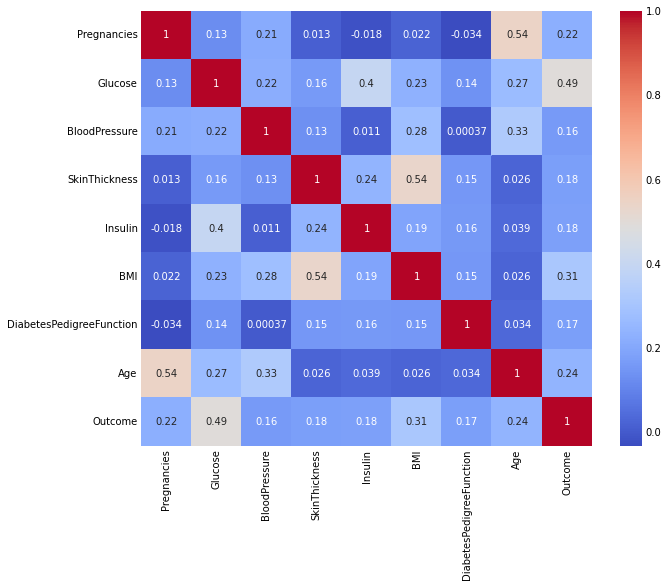

In [10]:
plt.figure(figsize=(9,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Apply VIF

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(df):
  vif = pd.DataFrame()
  vif['variables'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return vif

In [12]:
check_vif(data)

,variables,VIF
0,Pregnancies,3.274890
1,Glucose,21.351046
2,BloodPressure,31.910800
3,SkinThickness,12.518597
4,Insulin,3.307851
5,BMI,32.797700
6,DiabetesPedigreeFunction,3.182662
7,Age,14.249252


### Observations:
In the above results, we remark that many features has a high vif. however Blood Pressure feature have the highest vif. Let's remove it and check the result again.